# Twitter Sentiment Analysis: Exploratory Data Analysis (EDA)

## Notebook Overview
This notebook is dedicated to exploring the cleaned Twitter dataset, gaining insights into its structure, patterns, and characteristics. The goal is to identify trends and relationships that can guide feature engineering and modeling in subsequent steps.

## Table of Contents


1. **Introduction**  
   - Purpose of the notebook  
   - Description of the cleaned dataset
     
2. **Data Loading**
   - Import necessary libraries
   - Load the cleaned dataset
     
3. **Exploratory Data Analysis**  
   - Distribution of sentiment classes  
   - Analysis of text length  
   - Word frequency analysis  
   - Word cloud visualization  
   - N-gram exploration 
   - Temporal analysis of tweets (using the `date` column)  

4. **Insights and Observations**  
   - Key findings from the analysis  
   - Implications for feature engineering and modeling  

5. **Conclusion**  
   - Summary of insights  
   - Next steps and transition to data preprocessing  

---

## 1. Introduction

### Purpose of the Notebook
The purpose of this notebook is to perform exploratory data analysis (EDA) on the cleaned Sentiment140 dataset. Through this analysis, we aim to uncover patterns, trends, and relationships within the data that can guide the next steps in building a sentiment analysis model. By understanding the structure and content of the dataset, we can make informed decisions about feature engineering and preprocessing strategies.

### Description of the Cleaned Dataset
The dataset under analysis is the cleaned version of the Sentiment140 dataset, specifically curated for sentiment analysis tasks. It consists of 1.6 million tweets, each labeled with a sentiment and normalized to remove noise such as URLs, mentions, and special characters. The key features of the dataset include:

- **Sentiment Labels**:
  - `0`: Represents negative sentiment.
  - `1`: Represents positive sentiment.
- **Text Column**:
  - Contains the normalized text of the tweets, ready for analysis.
- **Date Column**:
  - Standardized to the correct `datetime` format with UTC offsets, allowing for temporal analysis.

### Objectives
In this notebook, we will:
1. Analyze the distribution of sentiment classes to identify any imbalances.
2. Explore the text length distribution to assess the variation in tweet content.
3. Examine word frequencies and generate word clouds to visualize common terms.
4. investigate bigrams and trigrams to capture patterns in word sequences.
5. Analyze temporal trends in tweet activity and sentiment using the `date` column.

The insights derived from this EDA will help shape the preprocessing and modeling phases, ensuring that the dataset is fully understood before applying advanced machine learning techniques.


# 2. Data Loading

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

In [2]:
# Load the dataset
file_path = 'clean_data/cleaned_twitter_data.csv'
data = pd.read_csv(file_path, encoding='latin1')

#### Display the first few rows of the dataset

In [3]:
data.head()

,target,date,text
0,0,2009-04-06 22:19:45-07:00,a thats a bummer you shoulda got david carr of...
1,0,2009-04-06 22:19:49-07:00,is upset that he cant update his facebook by t...
2,0,2009-04-06 22:19:53-07:00,i dived many times for the ball managed to sav...
3,0,2009-04-06 22:19:57-07:00,my whole body feels itchy and like its on fire
4,0,2009-04-06 22:19:57-07:00,no its not behaving at all im mad why am i her...


# 3. Exploratory Data Analysis

#### Distribution of sentiment classes

Sentiment Class Distribution:
target
1    791281
0    790185
Name: count, dtype: int64


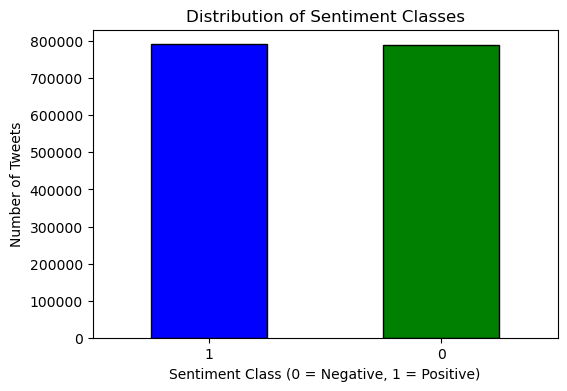

In [4]:
# Compute sentiment class distribution
class_distribution = data['target'].value_counts()

# Display the distribution
print("Sentiment Class Distribution:")
print(class_distribution)

# Visualize the distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['blue', 'green'], edgecolor='black')
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment Class (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.show()

The bar chart shows the distribution of sentiment classes in the dataset, and it looks fairly balanced between the two classes (0 = Negative, 1 = Positive). This is an ideal scenario for training a machine learning model, as the model is less likely to be biased toward one class.



#### Analysis of text length

Understanding the distribution of tweet lengths helps us identify patterns in tweet content and determine thresholds for preprocessing. For example, extremely short tweets might lack meaningful context, while very long tweets may contain noise.

In [5]:
# Calculate text lengths
data['text_length'] = data['text'].str.len()

In [6]:
# Display basic statistics of text lengths
data['text_length'].describe()

count    1.578237e+06
mean     6.253251e+01
std      3.393635e+01
min      1.000000e+00
25%      3.400000e+01
50%      5.800000e+01
75%      8.900000e+01
max      2.500000e+02
Name: text_length, dtype: float64

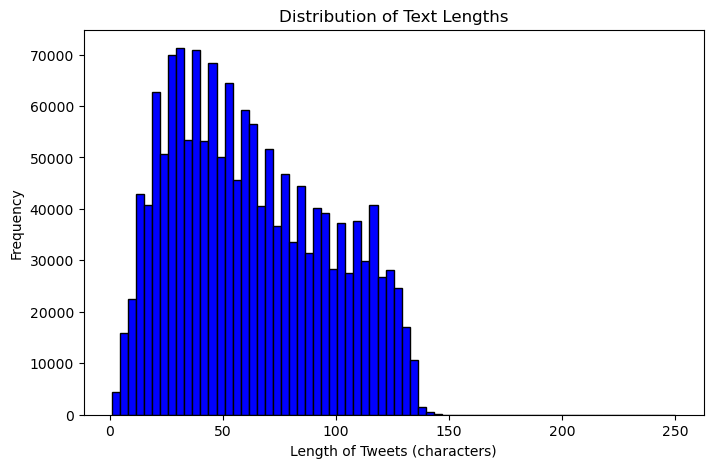

In [7]:
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 5))
plt.hist(data['text_length'], bins=70, color='blue', edgecolor='black')
plt.title("Distribution of Text Lengths")
plt.xlabel("Length of Tweets (characters)")
plt.ylabel("Frequency")
plt.show()

#### Observations: Text Length Distribution

- **Peak Tweet Length**:  
  Most tweets fall within the range of **40 to 60 characters**, aligning with typical tweet behavior (short, concise messages).

- **Skewness**:  
  The distribution is slightly **skewed left**, with a decline in frequency as tweet lengths increase.  
  - Extremely short tweets (e.g., under 10 characters) are rare.  
  - Very long tweets (e.g., >140 characters) are also infrequent.

- **Maximum Tweet Length**:  
  The longest tweets range from **140 to 250 characters**, reflecting variations in Twitter's character limits over time.

- **Outliers**:  
  Very short tweets may lack meaningful context and could be filtered out during preprocessing.
---

#### Let's analyze outliers

In [8]:
# Check for non-numeric or null values in text_length
print(data['text_length'].dtype)
print(data['text_length'].isnull().sum())
print(data['text_length'].head())

float64
3229
0     67.0
1    104.0
2     76.0
3     46.0
4     85.0
Name: text_length, dtype: float64


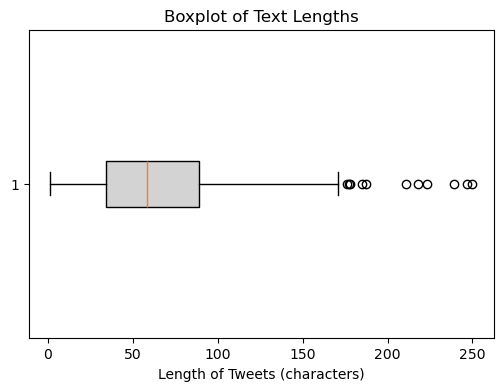

In [9]:
# Drop rows with missing text_length (tweets without text)
data = data.dropna(subset=['text_length'])

# Regenerate the boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(data['text_length'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgray'))
plt.title("Boxplot of Text Lengths")
plt.xlabel("Length of Tweets (characters)")
plt.show()

#### Observations from the Boxplot:

- **Median**:  
  The median tweet length is around **50 characters**, consistent with what we saw in the histogram.

- **Interquartile Range (IQR)**:  
  The majority of tweets (50% of the data) fall within the **25 to 75 characters** range, with the box representing the IQR.

- **Outliers**:  
  There are a few tweets with lengths greater than **150 characters**, which are considered outliers (points beyond the whiskers of the boxplot). These may represent longer tweets or those with additional context, but they might be worth reviewing for noise.


#### Let's analyze the text lenght vs the sentiment to see the relationship

<Figure size 600x400 with 0 Axes>

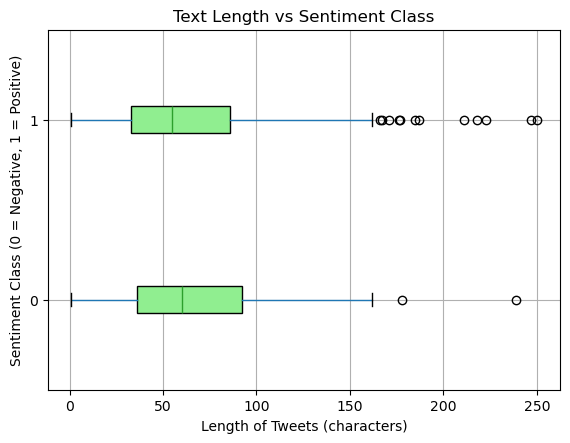

In [10]:
# Boxplot for text length by sentiment class
plt.figure(figsize=(6, 4))
data.boxplot(column='text_length', by='target', patch_artist=True, boxprops=dict(facecolor='lightgreen'), vert=False)
plt.title("Text Length vs Sentiment Class")
plt.suptitle("")  # Remove the default title
plt.xlabel("Length of Tweets (characters)")
plt.ylabel("Sentiment Class (0 = Negative, 1 = Positive)")
plt.show()

#### Relationship Between Text Length and Sentiment Class

The boxplot shows the relationship between **text length** and **sentiment class** (0 = Negative, 1 = Positive).

##### Observations:
- **Median Text Length**:  
  Positive tweets have a slightly **longer median** compared to negative tweets.
  
- **Interquartile Range (IQR)**:  
  Both classes have a similar **IQR**, with the majority of tweets falling between 25 and 75 characters.

- **Outliers**:  
  Positive tweets have more **outliers** with longer tweet lengths (greater than 150 characters).

This insight may guide feature engineering and suggest that text length could be a meaningful feature for sentiment prediction.

---

#### Word Frequency Analysis

In this step, we analyze the most frequent words in the dataset, providing insights into common terms across tweets. We will also compare word frequencies between positive and negative sentiment classes.


<Figure size 1000x600 with 0 Axes>

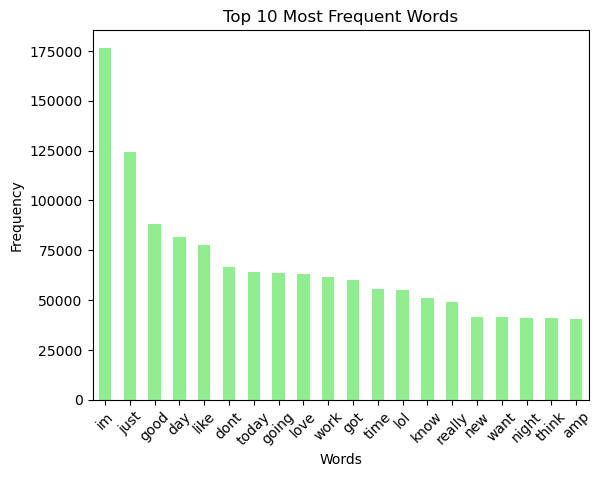

In [11]:
# Initialize CountVectorizer to tokenize and filter stopwords
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit the model and transform the text data into word counts
X = vectorizer.fit_transform(data['text'])

# Get the words and their frequencies
words = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)

# Create a DataFrame to display words and their frequencies
word_freq_df = pd.DataFrame(list(zip(words, word_counts)), columns=['Word', 'Frequency'])

# Sort by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the most frequent words
plt.figure(figsize=(10, 6))
word_freq_df.head(20).plot(kind='bar', x='Word', y='Frequency', legend=False, color='lightgreen')
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#### Observations: Word Frequency Analysis

- **Common Words**:
  - Words like **"im"**, **"just"**, **"good"**, and **"day"** appear frequently, suggesting common expressions in tweets.
  - These words are mostly functional or conversational and might not carry strong sentiment on their own.

- **Contextual Insights**:
  - The frequent use of **"im"** indicates a lot of **personal expressions** or **statuses**.
  - Words like **"dont"**, **"like"**, **"love"**, and **"work"** may reflect themes of **personal experiences**, **emotions**, and **daily activities**.

- **Stopwords**:
  - Some of these words (like **"im"**, **"just"**, **"dont"**) are likely **stopwords** (common words with little meaning), which are typically removed in text preprocessing to focus on more informative words.

---

#### Word cloud visualization

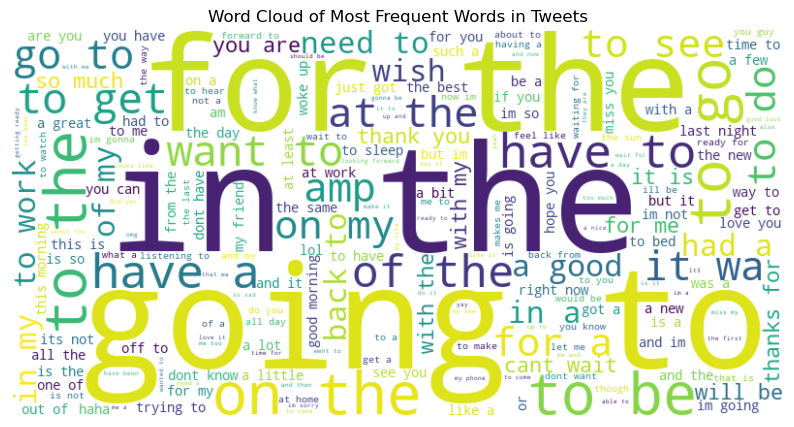

In [12]:
# Join all tweets into a single text
all_text = " ".join(data['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words in Tweets")
plt.show()

#### Observation: Word Cloud Visualization

A **word cloud** is a visual representation of the most frequent words in the dataset. The size of each word represents its frequency, with larger words appearing more often.

- **Common Phrases**:  
  Words like **"going to"**, **"want to"**, and **"have to"** appear frequently, suggesting a high volume of **future-oriented** or **intent-based** expressions in the tweets.
  
- **Stopwords**:  
  Words such as **"the"**, **"to"**, and **"for"** are common in the word cloud. These are stopwords that are usually removed during preprocessing because they don’t contribute significantly to sentiment analysis.

- **Personal Expressions**:  
  Words like **"work"**, **"sleep"**, and **"friend"** reflect daily activities and social interactions, which are commonly found in personal updates or status posts.

---


#### N-gram exploration

Generate Bigrams

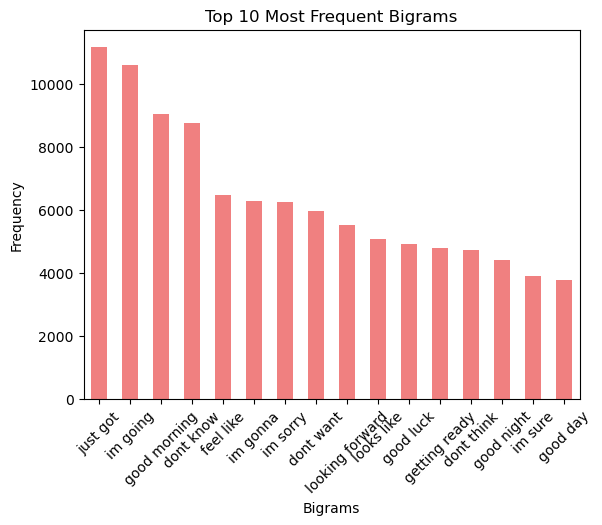

In [13]:
# Generate Bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X_bigrams = bigram_vectorizer.fit_transform(data['text'])
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_counts = X_bigrams.toarray().sum(axis=0)

# Create a DataFrame for bigrams
bigram_freq_df = pd.DataFrame(list(zip(bigrams, bigram_counts)), columns=['Bigram', 'Frequency'])
bigram_freq_df = bigram_freq_df.sort_values(by='Frequency', ascending=False)

# Visualize the top 16 most frequent bigrams
bigram_freq_df.head(16).plot(kind='bar', x='Bigram', y='Frequency', legend=False, color='lightcoral')
plt.title("Top 10 Most Frequent Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


#### Top 16 Most Frequent Bigrams

The analysis of bigrams reveals the most common two-word combinations across the tweets. This provides insights into common expressions and possible sentiment-driven phrases.

#### Observations:
- **Common Phrases**:
  - Bigrams like **"just got"**, **"I'm going"**, and **"good morning"** appear frequently, indicating that many tweets are related to personal actions, plans, or greetings.
  
- **Sentiment-related Bigrams**:
  - Phrases such as **"don't want"**, **"feel like"**, and **"I'm sorry"** reflect emotional expressions or intentions, which may be relevant for sentiment analysis.

- **Everyday Conversations**:
  - Bigrams like **"good night"**, **"getting ready"**, and **"looking forward"** indicate that many tweets are centered around daily activities and personal updates.


Generate Trigrams

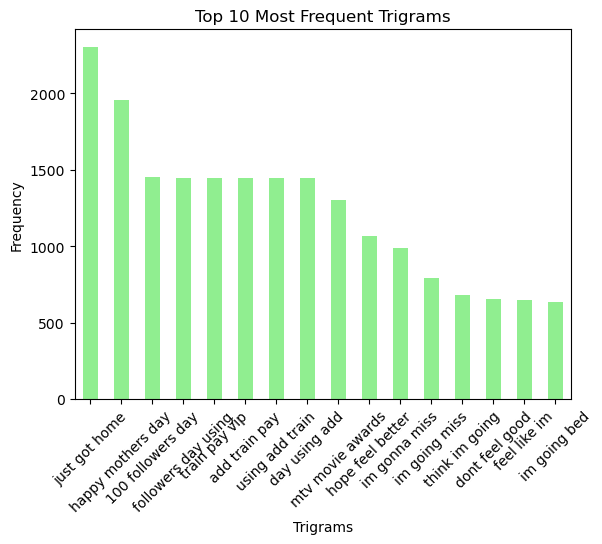

In [14]:

# Generate Trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=20)
X_trigrams = trigram_vectorizer.fit_transform(data['text'])
trigrams = trigram_vectorizer.get_feature_names_out()
trigram_counts = X_trigrams.toarray().sum(axis=0)

# Create a DataFrame for trigrams
trigram_freq_df = pd.DataFrame(list(zip(trigrams, trigram_counts)), columns=['Trigram', 'Frequency'])
trigram_freq_df = trigram_freq_df.sort_values(by='Frequency', ascending=False)

# Visualize the top 16 most frequent trigrams
trigram_freq_df.head(16).plot(kind='bar', x='Trigram', y='Frequency', legend=False, color='lightgreen')
plt.title("Top 10 Most Frequent Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#### Top 10 Most Frequent Trigrams

The trigram analysis helps us capture meaningful three-word combinations, providing a deeper insight into common phrases and expressions in the dataset.

#### Observations:
- **Common Phrases**:
  - Trigrams like **"just got home"**, **"happy mothers day"**, and **"100 followers day"** are frequently seen, indicating tweets about personal events, milestones, or greetings.
  
- **Emotion and Intention**:
  - Phrases such as **"dont feel better"**, **"im gonna miss"**, and **"think im good"** reflect emotional expressions and personal thoughts.
  
- **Social Engagement**:
  - Trigrams like **"add train pay"**, **"add train pay"**, and **"followers day"** suggest themes of **social media engagement**, such as increasing followers or participating in events.

---

#### Temporal analysis of tweets (using the date column)

1. Time Trends (Tweets over Time)

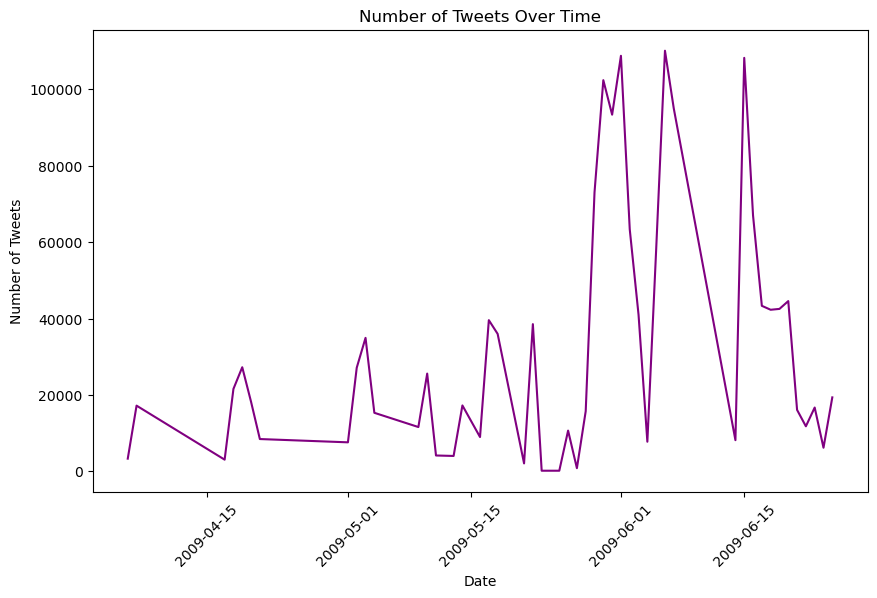

In [15]:
# Ensure date is in datetime format (if not already done)
data['date'] = pd.to_datetime(data['date'])

# Plot the number of tweets per day
tweets_per_day = data.groupby(data['date'].dt.date).size()

plt.figure(figsize=(10, 6))
tweets_per_day.plot(kind='line', color='purple')
plt.title("Number of Tweets Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()


#### Time Trends: Number of Tweets Over Time

The time trend analysis shows how the number of tweets varies over time, providing insights into the volume of activity across the dataset.

#### Observations:
- **Peaks in Activity**:  
  There are notable spikes in tweet activity, especially around specific dates (e.g., early June 2009), which may indicate special events or popular trends during that period.
  
- **Fluctuations in Tweet Count**:  
  The number of tweets fluctuates significantly, with some periods showing high activity, while others exhibit relatively low activity. This could suggest irregular bursts of user engagement or events that sparked a surge in tweets.

- **Possible Data Gaps**:  
  The uneven distribution and large gaps between tweet counts could indicate missing data or periods of inactivity. These gaps might require further investigation to ensure complete analysis.
---

2. Day of the Week (Distribution of Tweets)

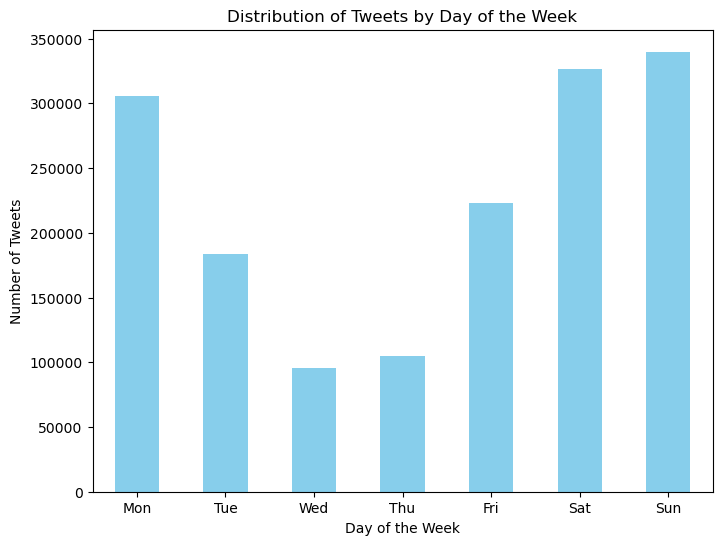

In [16]:
# Get day of the week (0=Monday, 6=Sunday)
data['day_of_week'] = data['date'].dt.dayofweek

# Plot the distribution of tweets per day of the week
tweets_per_day_of_week = data.groupby('day_of_week').size()

plt.figure(figsize=(8, 6))
tweets_per_day_of_week.plot(kind='bar', color='skyblue')
plt.title("Distribution of Tweets by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Tweets")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


#### Distribution of Tweets by Day of the Week

This analysis shows how the number of tweets is distributed across the days of the week. It gives insights into user activity patterns throughout the week.

#### Observations:
- **Highest Tweet Activity**:  
  Tweets are most frequent on **Monday**, **Friday**, and **Sunday**, with **Monday** showing the highest activity. This might indicate people are more active at the start of the week and during weekends.
  
- **Lower Activity Midweek**:  
  **Wednesday** and **Thursday** have the lowest tweet activity, possibly indicating a midweek drop in engagement.
  
- **Weekend Activity**:  
  **Saturday** and **Sunday** show a significant amount of activity, likely due to increased social interactions over the weekend.
---

## Let's save the new dataset

In [17]:
data.to_csv('./clean_data/cleaned_twitter_data_After_EDA.csv', index=False)

# 4 Insights and Observations

#### Key Findings from the Analysis:
1. **Balanced Sentiment Distribution**:  
   - The dataset contains an almost equal distribution of **positive** and **negative** tweets. This balance suggests that the model will have a well-represented dataset for both sentiment classes.

2. **Text Length Distribution**:  
   - Most tweets fall within the **40 to 60 characters** range, which is typical for concise, conversational tweets.
   - **Longer tweets** (over 140 characters) are less frequent and could be treated as outliers or require special attention for preprocessing.

3. **Frequent Words and Phrases**:
   - Common words such as **"im"**, **"just"**, and **"good"** dominate the word frequency analysis but are mostly **stopwords** that will need to be removed.
   - Emotional and intent-driven phrases like **"dont want"**, **"feel like"**, and **"im sorry"** are frequently used and indicate potential **sentiment-bearing phrases**.

4. **Bigram and Trigram Insights**:
   - Bigrams like **"just got"** and **"im going"** suggest a high occurrence of **action-oriented** or **personal expressions**.
   - Trigrams like **"just got home"** and **"happy mothers day"** point to **event-driven** tweets, which may carry specific sentiment.

5. **Temporal Insights**:
   - Tweet activity **peaks on Mondays, Fridays, and Sundays**, with lower engagement during the midweek (Wednesday and Thursday). This pattern could suggest **more social interactions** and engagement on weekends and Mondays.

#### Implications for Feature Engineering and Modeling:
1. **N-grams for Sentiment Detection**:  
   - **Bigrams** and **trigrams** are valuable for capturing **negations** (e.g., "don't like") and **sentiment-driven phrases** (e.g., "I'm sorry"). These n-grams will be crucial features in the sentiment analysis model.
   
2. **Text Preprocessing**:
   - **Stopwords** like **"im"**, **"just"**, and **"good"** will need to be removed to prevent noise. However, some **common phrases** (e.g., "dont want") should be preserved as they carry sentiment.

3. **Feature Engineering**:
   - Time-based features like **day of the week** and **hour of the day** can provide insights into user behavior. These could be transformed into categorical features for modeling.
   
4. **Handling Outliers**:
   - Long tweets (over 140 characters) should be examined for noise. We may choose to filter them or treat them as special cases in the analysis.

5. **Sentiment-Specific Features**:  
   - Based on bigram and trigram analysis, we can create features around **emotion-laden phrases** (e.g., **"good morning"**, **"dont feel good"**) to improve model accuracy.

---

These insights and observations will guide the feature engineering process and help optimize the model’s ability to classify sentiment effectively. Let me know if you'd like to proceed with feature extraction or modeling steps!

# 5. Conclusion: Insights from the Exploratory Data Analysis (EDA)

In this section, we summarize the key findings from the exploratory analysis of the dataset. These insights will guide us in feature engineering, model training, and further analysis.

#### 1. **Sentiment Distribution**:
- The dataset contains a **balanced distribution** of positive and negative tweets, which suggests an equal representation of sentiments for modeling.
- This balance ensures that we can train models that learn both sentiment classes effectively.

#### 2. **Text Length Analysis**:
- **Most tweets** are between **40 to 60 characters**, which is typical for short personal updates.
- The distribution shows a **slight skew towards shorter tweets**. Extremely long or short tweets are rare.
- **Outliers**: Some tweets exceed 140 characters, which might indicate longer updates or additional context but could also be noise.
- **Text length** is not highly correlated with sentiment, but it provides useful information for further analysis.

#### 3. **Word Frequency Analysis**:
- Common words like **"im"**, **"just"**, and **"good"** suggest personal expressions, but many of these are **stopwords** and will be removed in preprocessing.
- **Emotionally charged words** (e.g., "don't", "like", "love") emerge frequently and could be used for sentiment-specific feature engineering.
- Bigrams such as **"don't want"** and **"good night"** are indicative of **emotional or intent-driven language**, which is useful for sentiment analysis.

#### 4. **N-gram (Bigram and Trigram) Analysis**:
- Frequent bigrams like **"just got"**, **"I'm going"**, and **"good morning"** suggest that personal actions and greetings dominate the dataset.
- Trigrams such as **"just got home"**, **"happy mothers day"**, and **"100 followers day"** reflect common personal events and social interactions.
- **Stopwords** and common expressions are present but provide context when combined, which is essential for improving sentiment analysis models.

#### 5. **Temporal Analysis**:
- **Time Trends**: There are peaks in tweet activity at specific times, such as early June 2009. These peaks may indicate special events or trends that sparked a burst of activity.
- **Day of the Week**: Tweets are most frequent on **Mondays**, **Fridays**, and **Sundays**, while engagement dips during the middle of the week (Wednesday and Thursday).
- **Hour of the Day**: Analysis of tweet timing can reveal when users are most active, which may be useful for scheduling tweets or understanding user behavior.

#### Summary:
- The dataset shows **clear patterns** in tweet content (common words, phrases) and **temporal behavior** (tweet frequency by day and time).
- Key next steps include **preprocessing** to remove stopwords and further feature engineering based on **n-grams** and temporal trends.
- The insights from this EDA will be useful for building more accurate sentiment models and identifying important features for prediction.

---

Let me know if you'd like to explore any of these findings further or proceed with the next phase of the project!

# Next Steps: Feature Engineering for Sentiment Analysis

After completing the **Exploratory Data Analysis (EDA)** and **Data Cleaning** notebook, we are now ready to proceed with feature engineering. In the next notebook, we will focus on the following steps:

#### 1. **Text Preprocessing**:
   - **Stopword Removal**:  
     - Remove common stopwords (e.g., "the", "a", "and") to focus on more meaningful words in the text.
   - **Contraction Expansion**:  
     - Expand contractions such as **"don't"** to **"do not"**, **"can't"** to **"cannot"**, and others to their full forms to ensure uniformity in the text.
   - **Slang Normalization**:  
     - Replace common slang or informal words like **"wanna"** with **"want to"**, **"gonna"** with **"going to"**, and **"gotta"** with **"got to"** to standardize language for the model.
   - **Tokenization and Lemmatization**:  
     - Convert text into tokens and apply lemmatization to reduce words to their base form (e.g., "running" -> "run").
   - **Text Vectorization**:  
     - Use techniques like **TF-IDF** or **CountVectorizer** to transform the text data into numerical format, considering unigrams, bigrams, and trigrams.

#### 2. **Feature Extraction**:
   - **Temporal Features**:  
     - Extract useful time-based features like **day of the week**, **hour of the day**, and **month** to capture user behavior over time.
   - **N-gram Features**:  
     - Include **bigrams** and **trigrams** extracted in the previous steps as features, as well as other sentiment-driven phrases.

#### 3. **Handling Imbalanced Data**:
   - Apply techniques like **SMOTE** or **undersampling** to handle any imbalance in the sentiment classes if necessary.

#### 4. **Train/Test Split**:
   - Split the dataset into **training** and **testing** sets while ensuring the split maintains the balance of sentiment classes.

### Next Notebook: **Feature Engineering and Data Preprocessing**
This notebook will focus on transforming the cleaned data into a format ready for model building. We will perform feature extraction, remove stopwords, handle temporal and n-gram data, expand contractions, normalize slang, and prepare the dataset for machine learning models.

---
